In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
dataset = pd.read_pickle('df_FinalDataset.csv')

In [3]:
# Define columns to be removed
remove_these_columns = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'AttendingPhysician',
                        'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
                        'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                        'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                        'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                        'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                        'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
                        'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
                        ]


In [4]:
# Remove unnecessary columns
Train_category_removed = dataset.drop(axis=0, columns=remove_these_columns)

In [5]:
# Define features (X) and target variable (Y)
X_df = Train_category_removed[['InscClaimAmtReimbursed','OPAnnualDeductibleAmt',
                               'IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt', 
                               'OPAnnualReimbursementAmt', 'State', 'County',]]

In [6]:
Y_df = Train_category_removed['PotentialFraud']

In [7]:
# Convert 'Yes' and 'No' to 1 and 0
Y_df.replace(['Yes', 'No'], [1, 0], inplace=True)

In [8]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=101)

In [9]:
# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=69)

In [10]:
# Define hyperparameters for Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [11]:
# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=0)

In [12]:
# Fit the model
grid_search.fit(X_train, Y_train)

/Users/ganeshkukreja/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=69), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='f1')

In [13]:
# Get the best parameters
best_params = grid_search.best_params_


In [14]:
# Use the best parameters to create a new model
best_rf_classifier = RandomForestClassifier(**best_params, random_state=69)

In [15]:
# Fit the new model
best_rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, random_state=69)

In [16]:
# Predict on the test set
y_pred = best_rf_classifier.predict(X_test)

In [17]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
class_rep = classification_report(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

In [18]:
print("Best Hyperparameters:", best_params)
print("\nAccuracy:", round(accuracy * 100, 2))
print("F1 Score:", round(f1 * 100, 2))
print("\nClassification Report:\n", class_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}

Accuracy: 75.55
F1 Score: 65.79

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81    103529
           1       0.71      0.62      0.66     63935

    accuracy                           0.76    167464
   macro avg       0.74      0.73      0.73    167464
weighted avg       0.75      0.76      0.75    167464


Confusion Matrix:
 [[87143 16386]
 [24564 39371]]


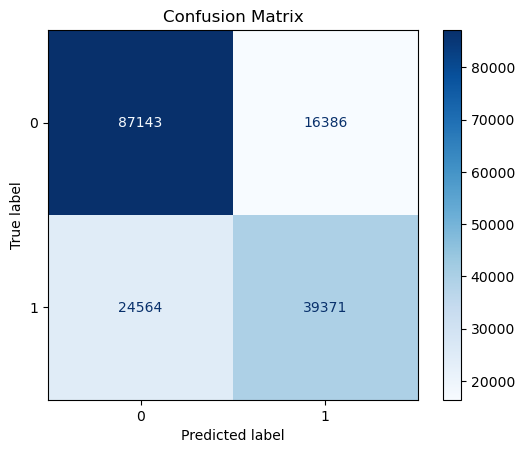

In [19]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Convert 'Dead_Alive' to 1 and 0
Train_category_removed['Dead_Alive'].replace(['Yes', 'No'], [1, 0], inplace=True)


In [21]:
# Define features (X) and target variable (Y)
X_df = Train_category_removed[['InscClaimAmtReimbursed','Claim_Duration', 'Att_Phy_tot_claims', 'OPAnnualDeductibleAmt',
                               'IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt', 
                               'OPAnnualReimbursementAmt', 'State', 'County', 'Dead_Alive']]

In [22]:
# Convert 'Yes' and 'No' to 1 and 0
Y_df.replace(['Yes', 'No'], [1, 0], inplace=True)

In [23]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=101)

In [24]:
# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=69)

In [25]:
# Define hyperparameters for Grid Search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [26]:
# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=0)

In [27]:
# Fit the model
grid_search.fit(X_train, Y_train)

/Users/ganeshkukreja/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=69), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='f1')

In [28]:
# Get the best parameters
best_params = grid_search.best_params_

In [29]:
# Use the best parameters to create a new model
best_rf_classifier = RandomForestClassifier(**best_params, random_state=69)

In [30]:
# Fit the new model
best_rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=False, min_samples_split=5, random_state=69)

In [31]:
# Predict on the test set
y_pred = best_rf_classifier.predict(X_test)

In [32]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
class_rep = classification_report(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

In [33]:
print("Best Hyperparameters:", best_params)
print("\nAccuracy:", round(accuracy * 100, 2))
print("F1 Score:", round(f1 * 100, 2))
print("\nClassification Report:\n", class_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Accuracy: 87.51
F1 Score: 82.04

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90    103529
           1       0.91      0.75      0.82     63935

    accuracy                           0.88    167464
   macro avg       0.88      0.85      0.86    167464
weighted avg       0.88      0.88      0.87    167464


Confusion Matrix:
 [[98793  4736]
 [16178 47757]]


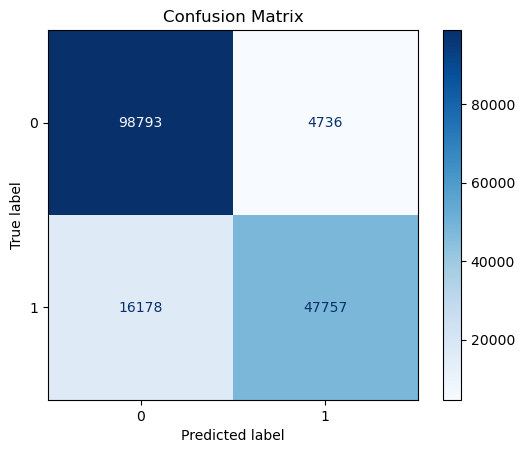

In [34]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_rf_classifier.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.title('Confusion Matrix')
plt.show()